# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Daffa Suada
- **Email:** suadaadaffa@gmail.com
- **ID Dicoding:** daffa_suada_i9ug

## Menentukan Pertanyaan Bisnis

- Bagaimana performa penyewaan sepedah dalam beberapa tahun terakhir?
- Bagaimana performa penyewaan sepedah setiap hari dalam seminggu?
- Bagaimana performa penyewaan sepedah dalam hari dan jam?
- Apakah terdapat korelasi antara kondisi cuaca dan performa penyewaan sepedah?
- Adakah pengaruh kondisi cuaca dalam penyewaan sepedah?
- Bagaimana perbandingan antar musim dengan pengguna registered dan casual?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [2]:
#Load tabel day
day_df = pd.read_csv("bike-sharing-dataset/day.csv")

day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
day_total = day_df['cnt'].sum()

print(day_total)

3292679


In [4]:
#Load tabel hour
hour_df = pd.read_csv("bike-sharing-dataset/hour.csv")

hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
hour_total = hour_df['cnt'].sum()

print(hour_total)

3292679


**Insight:**
- Data ini merupakan tugas akhir dicoding pada proyek analisis data.
- Data ini adalah kumpulan data historis penggunaan sepedah pada rentang tahun 2011 sampai dengan 2012 dari Capital Bikeshare, Washington DC., AS.
- Terdapat 2 data set yaitu, data day dan data hour. Sekilas terlihat mirip, oleh karena itu kita akan melakukan analisis lanjutan untuk menilai data.

### Assessing Data

In [6]:
#Melihat informasi data day
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
#Menghitung missing value
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
#Melihat data duplikat
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [9]:
#Melihat parameter statistik
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [10]:
#Melihat informasi data hour
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [11]:
#Menghitung missing value
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [12]:
hour_df['instant'].count()

17379

In [13]:
#Melihat data duplikat
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [14]:
#Melihat parameter statistik
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Terdapat tipe data yang tidak sesuai pada colomn dteday yaitu bertipe data object
- Tidak ada data kosong pada kedua data set yang kita periksa (day dan hour)
- Tidak ada data duplikasi pada data set day dan hour


### Cleaning Data

In [15]:
#Mengubah tipe data dteday day_df
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [16]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [17]:
#Mengubah tipe data dteday hour_day
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [18]:
#Mengganti nama kolom hr dan cnt
hour_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'hr':'hour',
    'cnt': 'count'
}, inplace=True)

In [19]:
#Menghapus kolom yr dan mnth yang nantinya akan di buat berdasarkan dteday
drop_col = ['year', 'month', 'weekday']

hour_df.drop(columns=drop_col, inplace=True)

hour_df.head()

,instant,dateday,season,hour,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,0,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,1,0,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,2,0,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,3,0,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,4,0,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [20]:
#Menambah kolom tahun dan bulan berdasarkan dteday
hour_df['year'] = hour_df['dateday'].dt.year
hour_df['month'] = hour_df['dateday'].dt.month_name()
hour_df['weekday'] = hour_df['dateday'].dt.day_name()

#Menyisipkan tahun dan bulan setelah dteday
hour_df.insert(3, 'year', hour_df.pop('year'))
hour_df.insert(4, 'month', hour_df.pop('month'))
hour_df.insert(7, 'weekday', hour_df.pop('weekday'))
hour_df.head()

,instant,dateday,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,2011,January,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,2011,January,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,2011,January,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,2011,January,3,0,Saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,2011,January,4,0,Saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [21]:
#Mengubah data season sesuai dengan keterangan
hour_df['season'] = hour_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})

hour_df.head()

,instant,dateday,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,January,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,January,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,January,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,January,3,0,Saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,January,4,0,Saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**


## Exploratory Data Analysis (EDA)

In [22]:
#Grouping berdasarkan tahun dan bulan
hour_df.groupby(by = ["year", "month"]).agg({
    "count" : ['max', 'min', 'mean', 'sum'],
})

count                        
                 max min        mean     sum
year month                                  
2011 April       530   1  131.947149   94870
     August      651   1  186.991792  136691
     December    477   1  117.844804   87323
     February    327   1   74.291217   48215
     January     249   1   55.507267   38189
     July        596   1  189.974462  141341
     June        638   1  199.322222  143512
     March       336   1   87.732877   64045
     May         611   1  182.555108  135821
     November    553   1  142.095967  102167
     October     625   1  166.232840  123511
     September   628   1  177.709902  127418
2012 April       822   1  242.651811  174224
     August      941   3  288.310484  214503
     December    759   1  166.729111  123713
     February    610   1  149.041908  103137
     January     559   1  130.558704   96744
     July        913   2  273.665323  203607
     June        900   4  281.708333  202830
     March       957   1  221.904441  164875
     May         873   1  263.259409  195865
     November    729   1  212.623955  152664
     October     963   1  280.848870  198841
     September   977   3  303.573611  218573

In [23]:
#Grouping berdasarkan mingguan
hour_df['weekday'] = pd.Categorical(hour_df['weekday'],
                                    categories=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'],
                                    ordered=True)

hour_df.groupby(by='weekday', observed=True).agg({"count": 'sum'})

,count
weekday,
Sunday,444027
Monday,455503
Tuesday,469109
Wednesday,473048
Thursday,485395
Friday,487790
Saturday,477807


In [24]:
#Grouping perhari berdasarkan jam
hour_df.groupby(by = ["weekday", "hour"],observed=True).agg({"count" : 'sum'})

count
weekday  hour       
Sunday   0      9775
         1      8053
         2      6286
         3      3239
         4       955
...              ...
Saturday 19    24953
         20    18810
         21    16224
         22    14525
         23    12049

[168 rows x 1 columns]

In [25]:
#Grouping berdasarkan kondisi cuaca

hour_df.groupby(by='weathersit').agg({'count':'sum'}).reset_index()

,weathersit,count
0,1,2338173
1,2,795952
2,3,158331
3,4,223


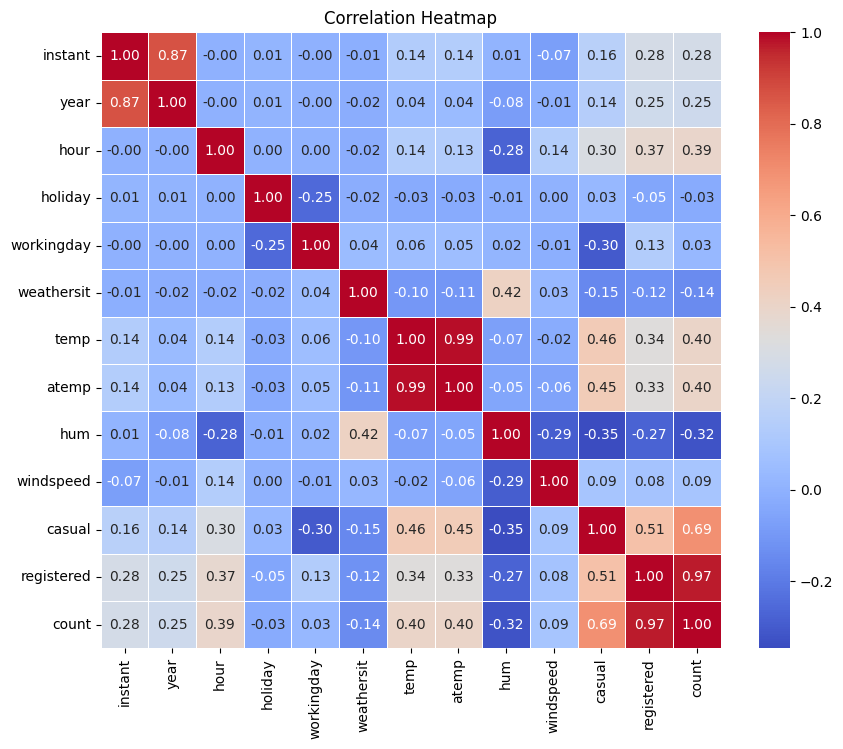

In [26]:
#Mencari korelasi yang terhubung dengan penggunaan sepedah
corr_matrix = hour_df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [27]:
#Grouping pengguna berdasarkan season
hour_df.groupby(by=['season']).agg({"count" : "sum"})

,count
season,
Fall,1061129
Spring,471348
Summer,918589
Winter,841613


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa penyewaan sepedah dalam beberapa tahun terakhir?

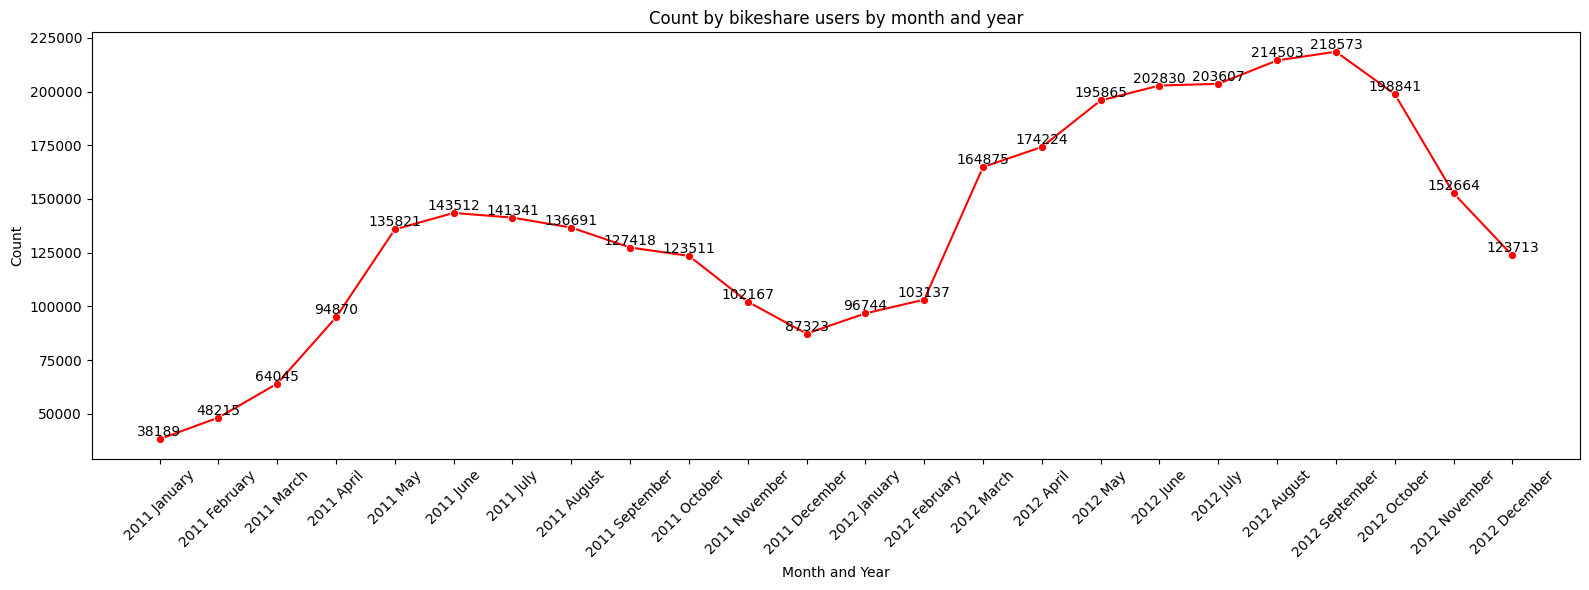

In [28]:
plt.figure(figsize=(16,6))

# Menggabungkan data tahun dan bulan dengan format 'Tahun Bulan'
hour_df['year_month'] = hour_df['year'].astype(str) + ' ' + hour_df['month']

# Melakukan groupby berdasarkan year_month dan menjumlahkan count
grouping_year_df = hour_df.groupby(by=['year_month']).agg({"count": "sum"}).reset_index()

# Mengurutkan data berdasarkan urutan waktu (tahun dan bulan)
grouping_year_df['year_month_datetime'] = pd.to_datetime(grouping_year_df['year_month'], format='%Y %B')
grouping_year_df = grouping_year_df.sort_values(by='year_month_datetime')

# Membuat line plot menggunakan sns
sns.lineplot(x="year_month", y="count", data=grouping_year_df, color='red', marker='o')

# Menambahkan label angka di setiap titik
for x, y in zip(grouping_year_df['year_month'], grouping_year_df['count']):
    plt.text(x, y, f'{y}', color='black', ha='center', va='bottom')

# Menambah label dan title pada plot
plt.xlabel("Month and Year")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.title("Count by bikeshare users by month and year")

# Menampilkan plot
plt.tight_layout()
plt.show()


- Data tahunan di atas menunjukan penggunaan sepedah pada tahun 2011 sampai tahun 2012. Perubahan data menunjukan peningkatan yang positif.
- Pada tahun 2011 Penggunaan sepedah paling sedikit ada pada bulan januari yaitu sebanyak 38189, lalu pengguna paling banyak ada pada bulan juni sebanyak 143512.
- Pada tahun 2012 Penggunaan sepedah paling sedikit juga terjadi pada bulan januari, yaitu sebanyak 96744, dan yang tertinggi pada bulan september sebanyak 218573.


### Pertanyaan 2: Bagaimana performa penyewaan sepedah setiap hari dalam seminggu?

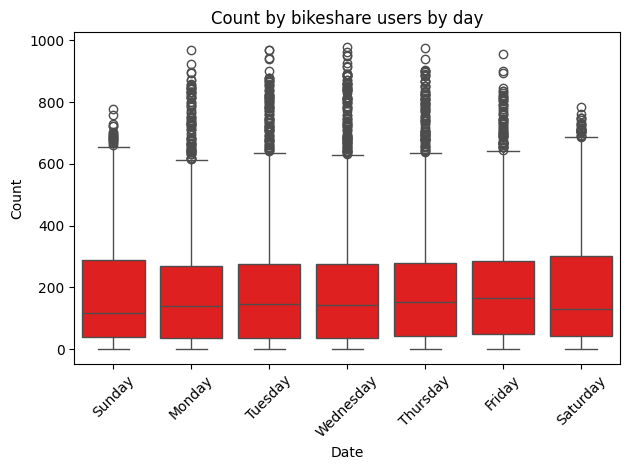

In [29]:
#Mengurutkan data harian berdasarkan kategori
hour_df['weekday'] = pd.Categorical(hour_df['weekday'],
                                    categories=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'],
                                    ordered=True)

hour_df.groupby(by='weekday', observed=True).agg({"count": 'sum'})

sns.boxplot(x="weekday", y="count", data=hour_df, color='red')

# Add labels and a title to the plot
plt.xlabel("Date")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.title("Count by bikeshare users by day")

# Show the plot
plt.tight_layout()
plt.show()

- Penggunaan mingguan pada boxplot terlihat stabil dengan rata rata 143 penyewaan sepedah
- Rata rata terendah di dapatkan pada angka 116 pada hari minggu, dan tertinggi pada angka 165 di hari jumat.
- Terdapat outlier yang tinggi hingga lebih dari 800. Ini menunjukan terdapat lonjakan yang sangat signifikan pada hari hari tertentu. 

### Pertanyaan 3: Bagaimana performa penyewaan sepedah dalam hari dan jam?

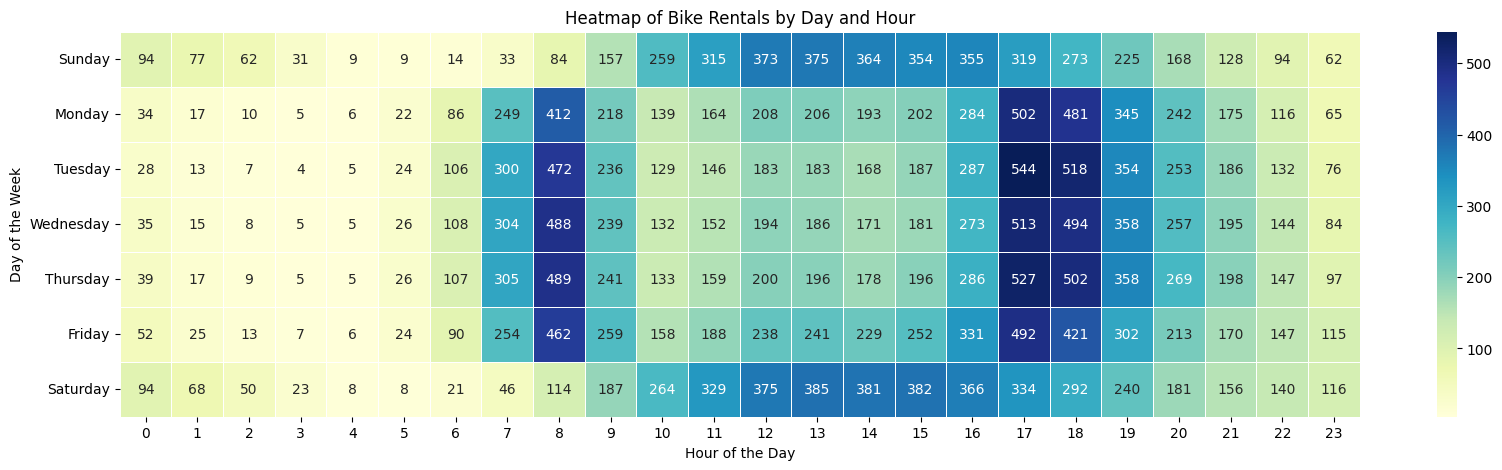

In [30]:
pivot_table = hour_df.pivot_table(index="weekday",columns="hour",values="count", observed=True).fillna(0)

# Membuat heatmap menggunakan Seaborn
plt.figure(figsize=(20, 5))
sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt=".0f", linewidths=0.5)

# Memberi label dan judul
plt.title('Heatmap of Bike Rentals by Day and Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')

plt.show()

- Data harian diatas menunjukan bahwa penggunaan sering dilakukan pada weekday atau waktu kerja, yaitu senin sampai dengan jumat.
- Peningkatan waktu terdapat pada jam 6 sampai dengan puncaknya jam 8 pagi. Lalu mengalami penurunan pada jam jam selanjutnya.
- Peningkatan kembali membesar pada jam 17 sampai dengan jam 18, dan berangsur menurun pada jam jam selanjutnya.
- Saya memperkirakan waktu waktu tersebut adalah waktu saat orang orang ingin berangkat kerja dan pulang kejra, karena waktu tersebut terjadi pada weekday, dan terjadi pada waktu kerja yaitu keberangkatan jam 8 dan kepulangan jam 5.

### Pertanyaan 4: Apakah terdapat korelasi antara kondisi cuaca dan performa penyewaan sepedah?

Text(0.5, 1.0, 'Humidity vs Count')

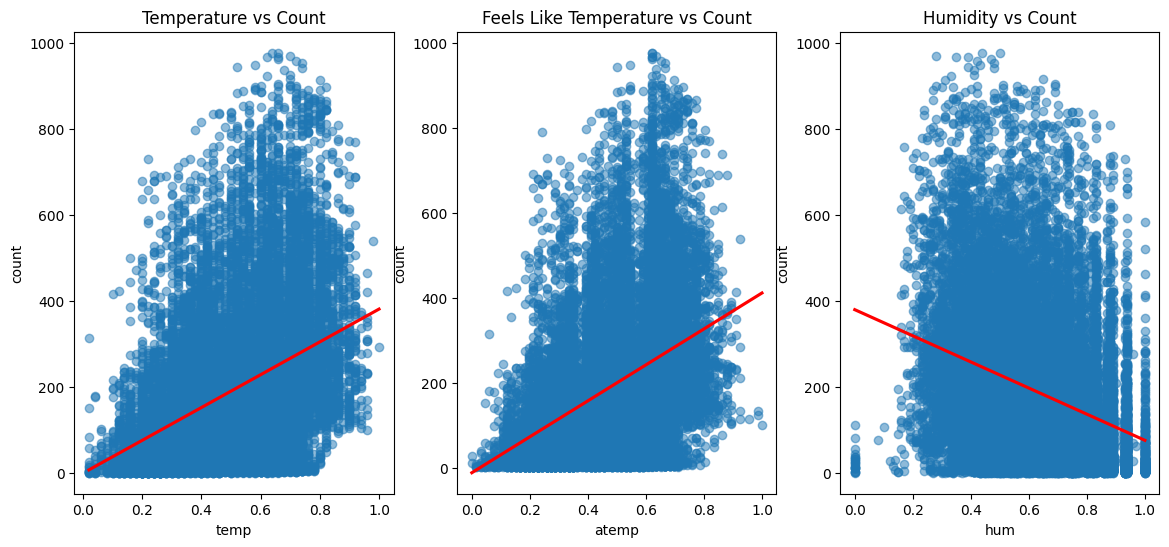

In [31]:
plt.figure(figsize=(14, 6))

# Scatter plot untuk 'temp' vs 'count'
plt.subplot(1, 3, 1)
sns.regplot(
    x='temp',
    y='count',
    data=hour_df,
    # alpha=0.5
    scatter_kws={'alpha': 0.5},  # Transparansi untuk titik-titik scatter plot
    line_kws={'color': 'red'},  # Warna garis korelasi
    ci=None
)
plt.title('Temperature vs Count')

# Scatter plot untuk 'atemp' vs 'count'
plt.subplot(1, 3, 2)
sns.regplot(
    x='atemp',
    y='count',
    data=hour_df,
    # alpha=0.5
    scatter_kws={'alpha': 0.5},  # Transparansi untuk titik-titik scatter plot
    line_kws={'color': 'red'},  # Warna garis korelasi
    ci=None
)
plt.title('Feels Like Temperature vs Count')

# Scatter plot untuk 'hum' vs 'count'
plt.subplot(1, 3, 3)
sns.regplot(
    x='hum',
    y='count',
    data=hour_df,
    # alpha=0.5
    scatter_kws={'alpha': 0.5},  # Transparansi untuk titik-titik scatter plot
    line_kws={'color': 'red'},  # Warna garis korelasi
    ci=None
)
plt.title('Humidity vs Count')

- Temperatur menunjukan korelasi positif terhadap penyewaan sepdah, yang berarti penggunaan sepedah berpengaruh terhadap temperatur dan suhu.
- Sebaliknya pada kelembaban menunjukan korelasi negatif terhadap penyewaan sepedah, yang berarti dengan kelembaban yang tinggi mengakibatkan pengguna kurang nyaman untuk berkendara.

### Pertanyaan 5: Adakah pengaruh kondisi cuaca dalam penyewaan sepedah?

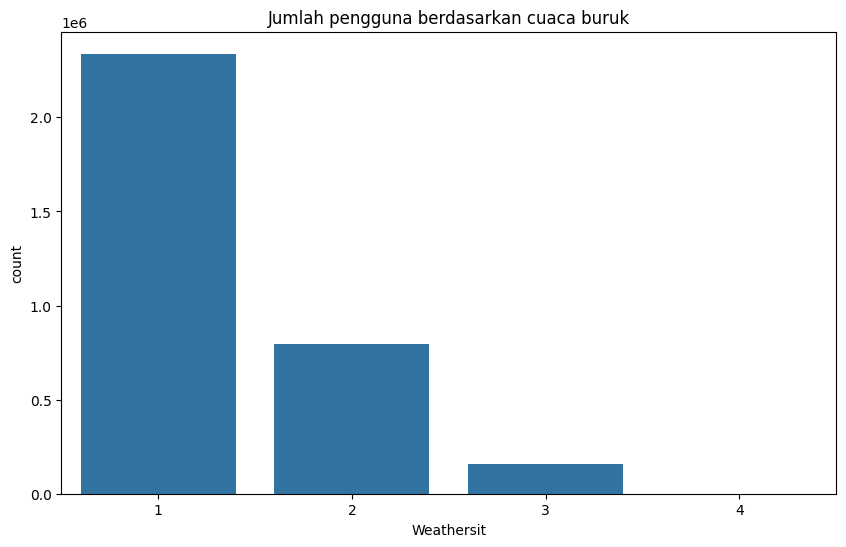

In [32]:
grouping_weathersit = hour_df.groupby(by='weathersit').agg({'count':'sum'}).reset_index()
plt.figure(figsize=(10,6))

sns.barplot(x='weathersit', y= 'count', data=grouping_weathersit)

plt.title('Jumlah pengguna berdasarkan cuaca buruk')
plt.xlabel('Weathersit')
plt.ylabel('count')
plt.show()

Note : 
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

- Pengguna lebih menyukai cuaca yang relatif cerah
- Untuk kondisi cuaca yang ekstrim terdapat lebih sedikit pengguna dari pada cuaca yang relatif cerah.


### Pertanyaan 6: Bagaimana perbandingan antar cuaca dengan pengguna registered dan casual?

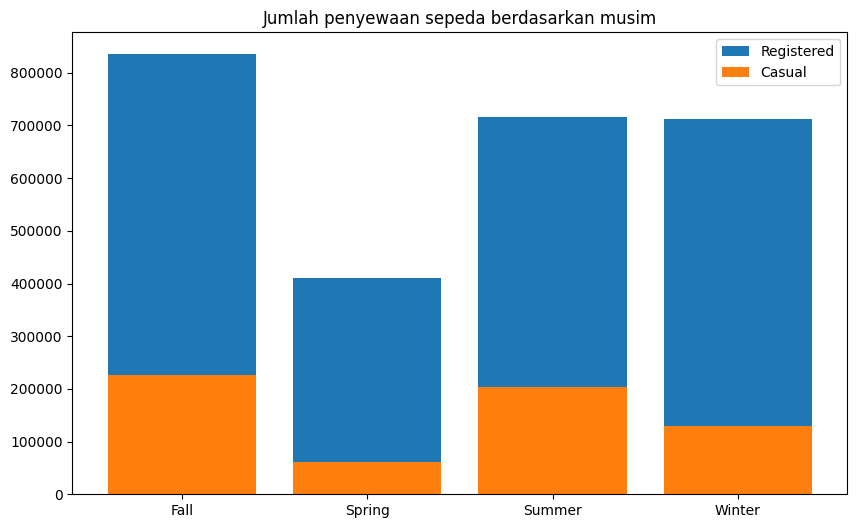

In [33]:
grouping_season_df = hour_df.groupby(by='season').agg({"registered" : "sum", "casual" : "sum"}).reset_index()

plt.figure(figsize=(10, 6))

plt.bar(
    grouping_season_df['season'],
    grouping_season_df['registered'],
    label='Registered',
    color='tab:blue'
)

plt.bar(
    grouping_season_df['season'],
    grouping_season_df['casual'],
    label='Casual',
    color='tab:orange'
)

plt.xlabel(None)
plt.ylabel(None)
plt.title('Jumlah penyewaan sepeda berdasarkan musim')
plt.legend()
plt.show()

- Pengunggan tertinggi terdapat pada musim gugur(Fall), lalu diikuti dengan musim panas(Summer), musim dingin (Winter), dan yang terendah adalah musim semu(Spring).

### **Insight:**
1. Tren penggunaan sepedah 2011 sampai 2012
    - Terdapat peningkatan positif dalam penggunaan sepeda dari tahun 2011 ke 2012.
    - Peningkatan tertinggi di bulan bulan tertentu menunjukan adanya faktor yang mempengaruhi penggunaan sepedah.

2. Tren penggunaan mingguan yang stabil
    - Penyewaan sepeda setiap hari dalam seminggu menunjukkan pola yang cukup stabil dengan rata-rata sekitar 143 penyewaan per hari.

3. Tren penyewaan berdasarkan jam
    - Penggunaan sepeda meningkat signifikan pada pagi hari (jam 6-8) dan sore hari (jam 17-18), menunjukkan bahwa sepeda sering digunakan untuk aktivitas berangkat dan pulang kerja.

4. Korelasi kondisi cuaca dan penggunaan sepedah
    - Temperatur menunjukkan korelasi positif dengan penyewaan sepeda, sehingga saat cuaca lebih hangat, penggunaan sepeda cenderung meningkat.
    - Sebaliknya pada kelembaban menunjukan korelasi negatif terhadap penyewaan sepedah, yang berarti dengan kelembaban yang tinggi mengakibatkan pengguna kurang nyaman untuk berkendara.

5. Kondisi cuaca terhadap penggunaan sepedah
    - Pengguna lebih menyukai kondisi cuaca yang relatif cerah dan menghindari cuaca ekstrim.

6. Perbandingan antar musim
    - Penggunaan tertinggi terjadi pada musim gugur (Fall), diikuti oleh musim panas (Summer). Musim semi (Spring) dan musim dingin (Winter) menunjukkan penggunaan yang lebih rendah, kemungkinan karena cuaca yang kurang mendukung.